# Objective
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

My job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then I've to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.cluster import KMeans

# Data Read and Inspection

In [2]:
## let's read our data file and check head of the dataset
help_ngo = pd.read_csv('Country-data.csv')
help_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
## check shape of the datafreame
help_ngo.shape

(167, 10)

In [4]:
## check info about dataframe
help_ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
## check for null values 
help_ngo.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There is no null values in any column of the data frame

In [6]:
## lets remove duplicate if have any and check shape again
help_ngo.drop_duplicates(subset=['country'],keep='first',inplace =True)


In [7]:
help_ngo.shape ## cheking shape

(167, 10)

There is no duplicate value as per country

In [8]:
## checking statistical description of the data set
help_ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


As per data dictinary 
1.  exports:	Exports of goods and services per capita. Given as %age of the GDP per capita
2.	health:	Total health spending per capita. Given as %age of GDP per capita
3.	imports:	Imports of goods and services per capita. Given as %age of the GDP per capita

hence converting them to their absolute values 

In [9]:
help_ngo['exports'] = help_ngo['exports']*help_ngo['gdpp']/100
help_ngo['health'] = help_ngo['health']*help_ngo['gdpp']/100
help_ngo['imports'] = help_ngo['imports']*help_ngo['gdpp']/100



In [10]:
## check head after convertion
help_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# EDA

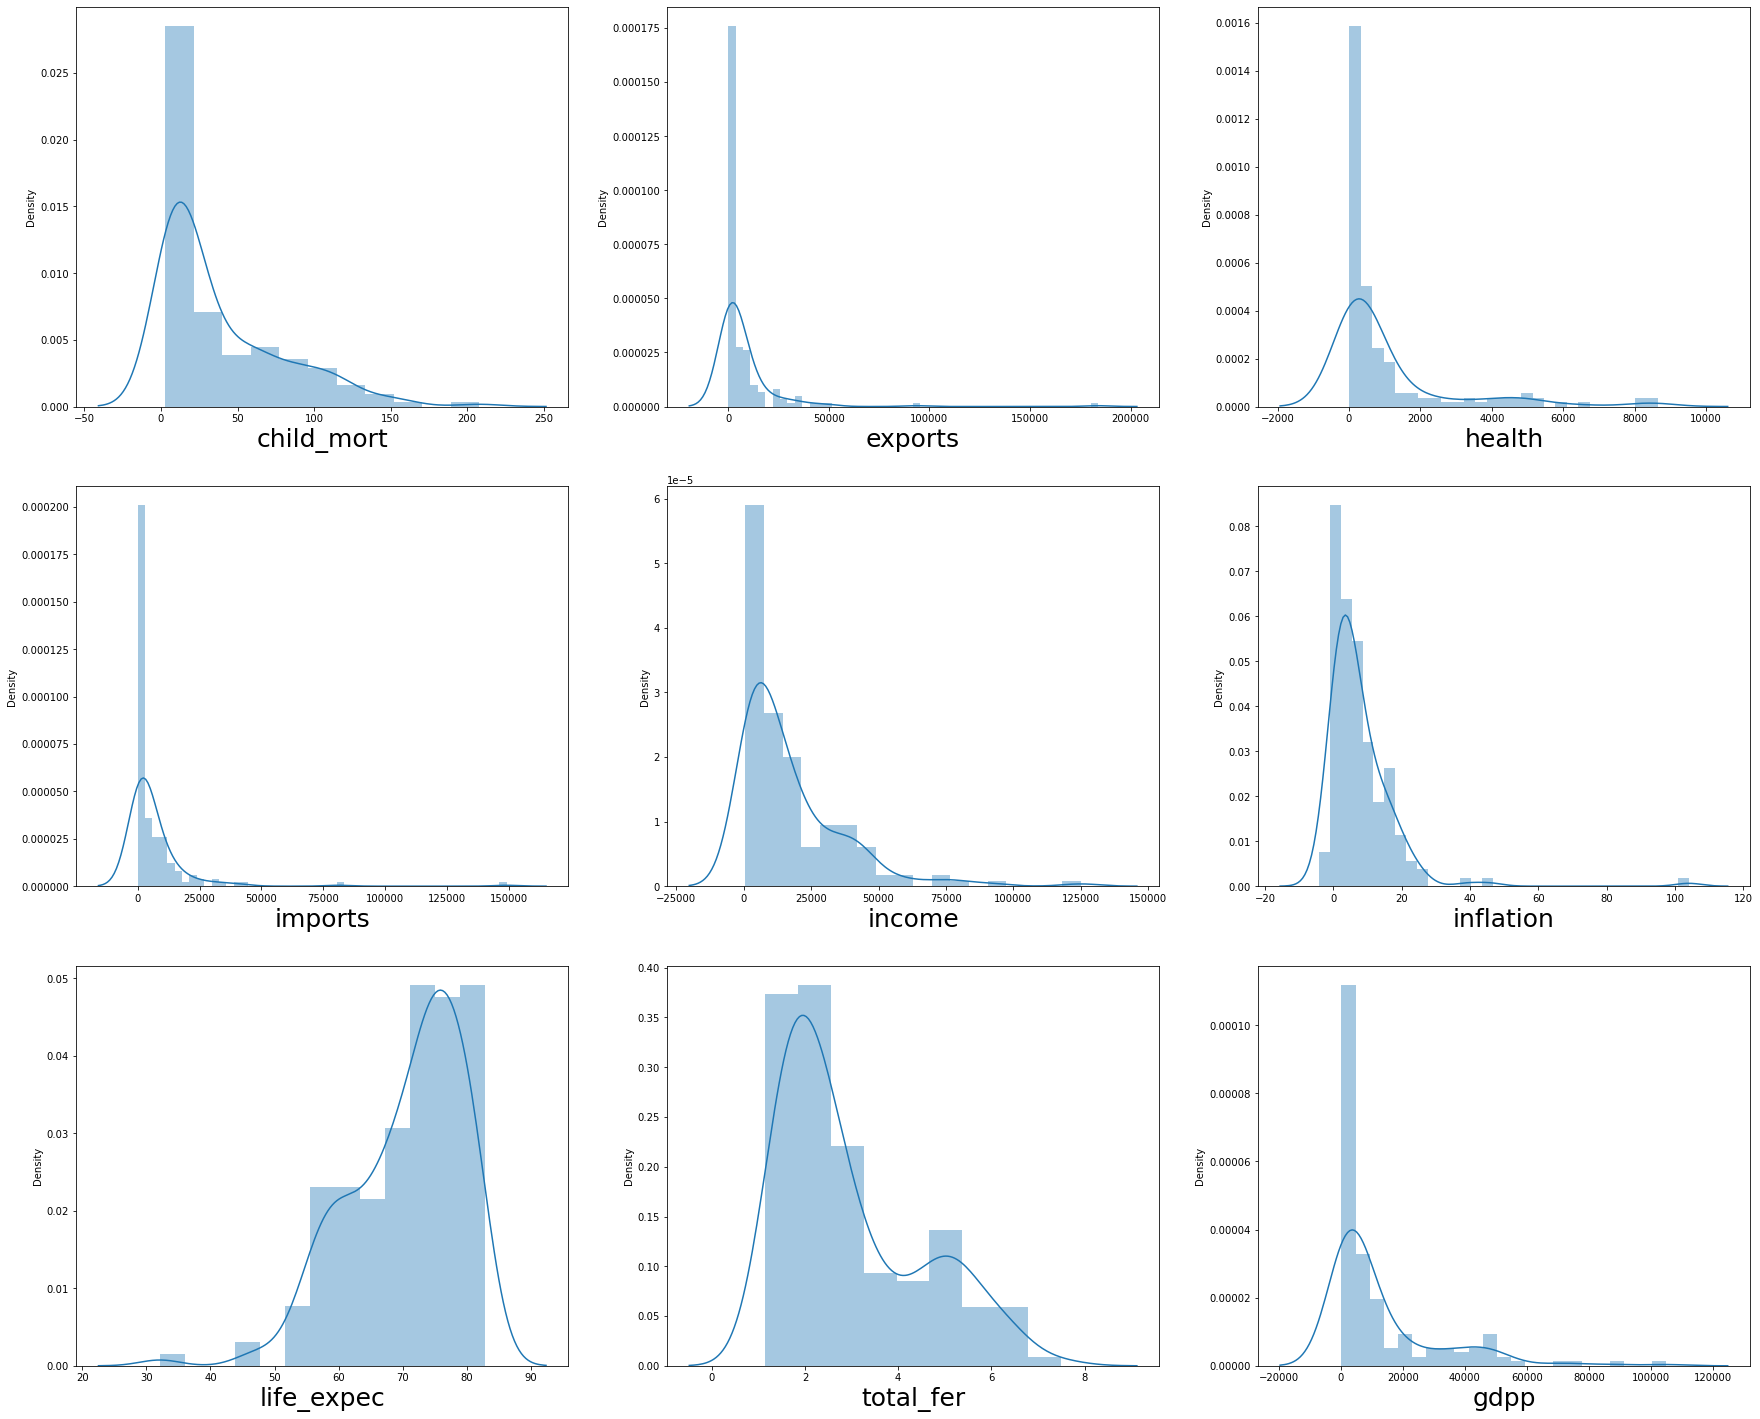

In [11]:
plt.figure(figsize=(30,25))
features = help_ngo.columns[1:help_ngo.shape[1]]
for i in enumerate(features):
    #print(i)
    plt.subplot(3,3,i[0]+1)
    ax = sns.distplot(help_ngo[i[1]])
    ax.set_xlabel(i[1],fontsize=25)
#plt.tight_layout()

All variables are mainly left skewed except life_expectency 
.clearly there are two peaks on total_fer so this variable can be used for clusters profiling after created different clusters from the data 
.As variables are left skewed that means variables are also have outliers

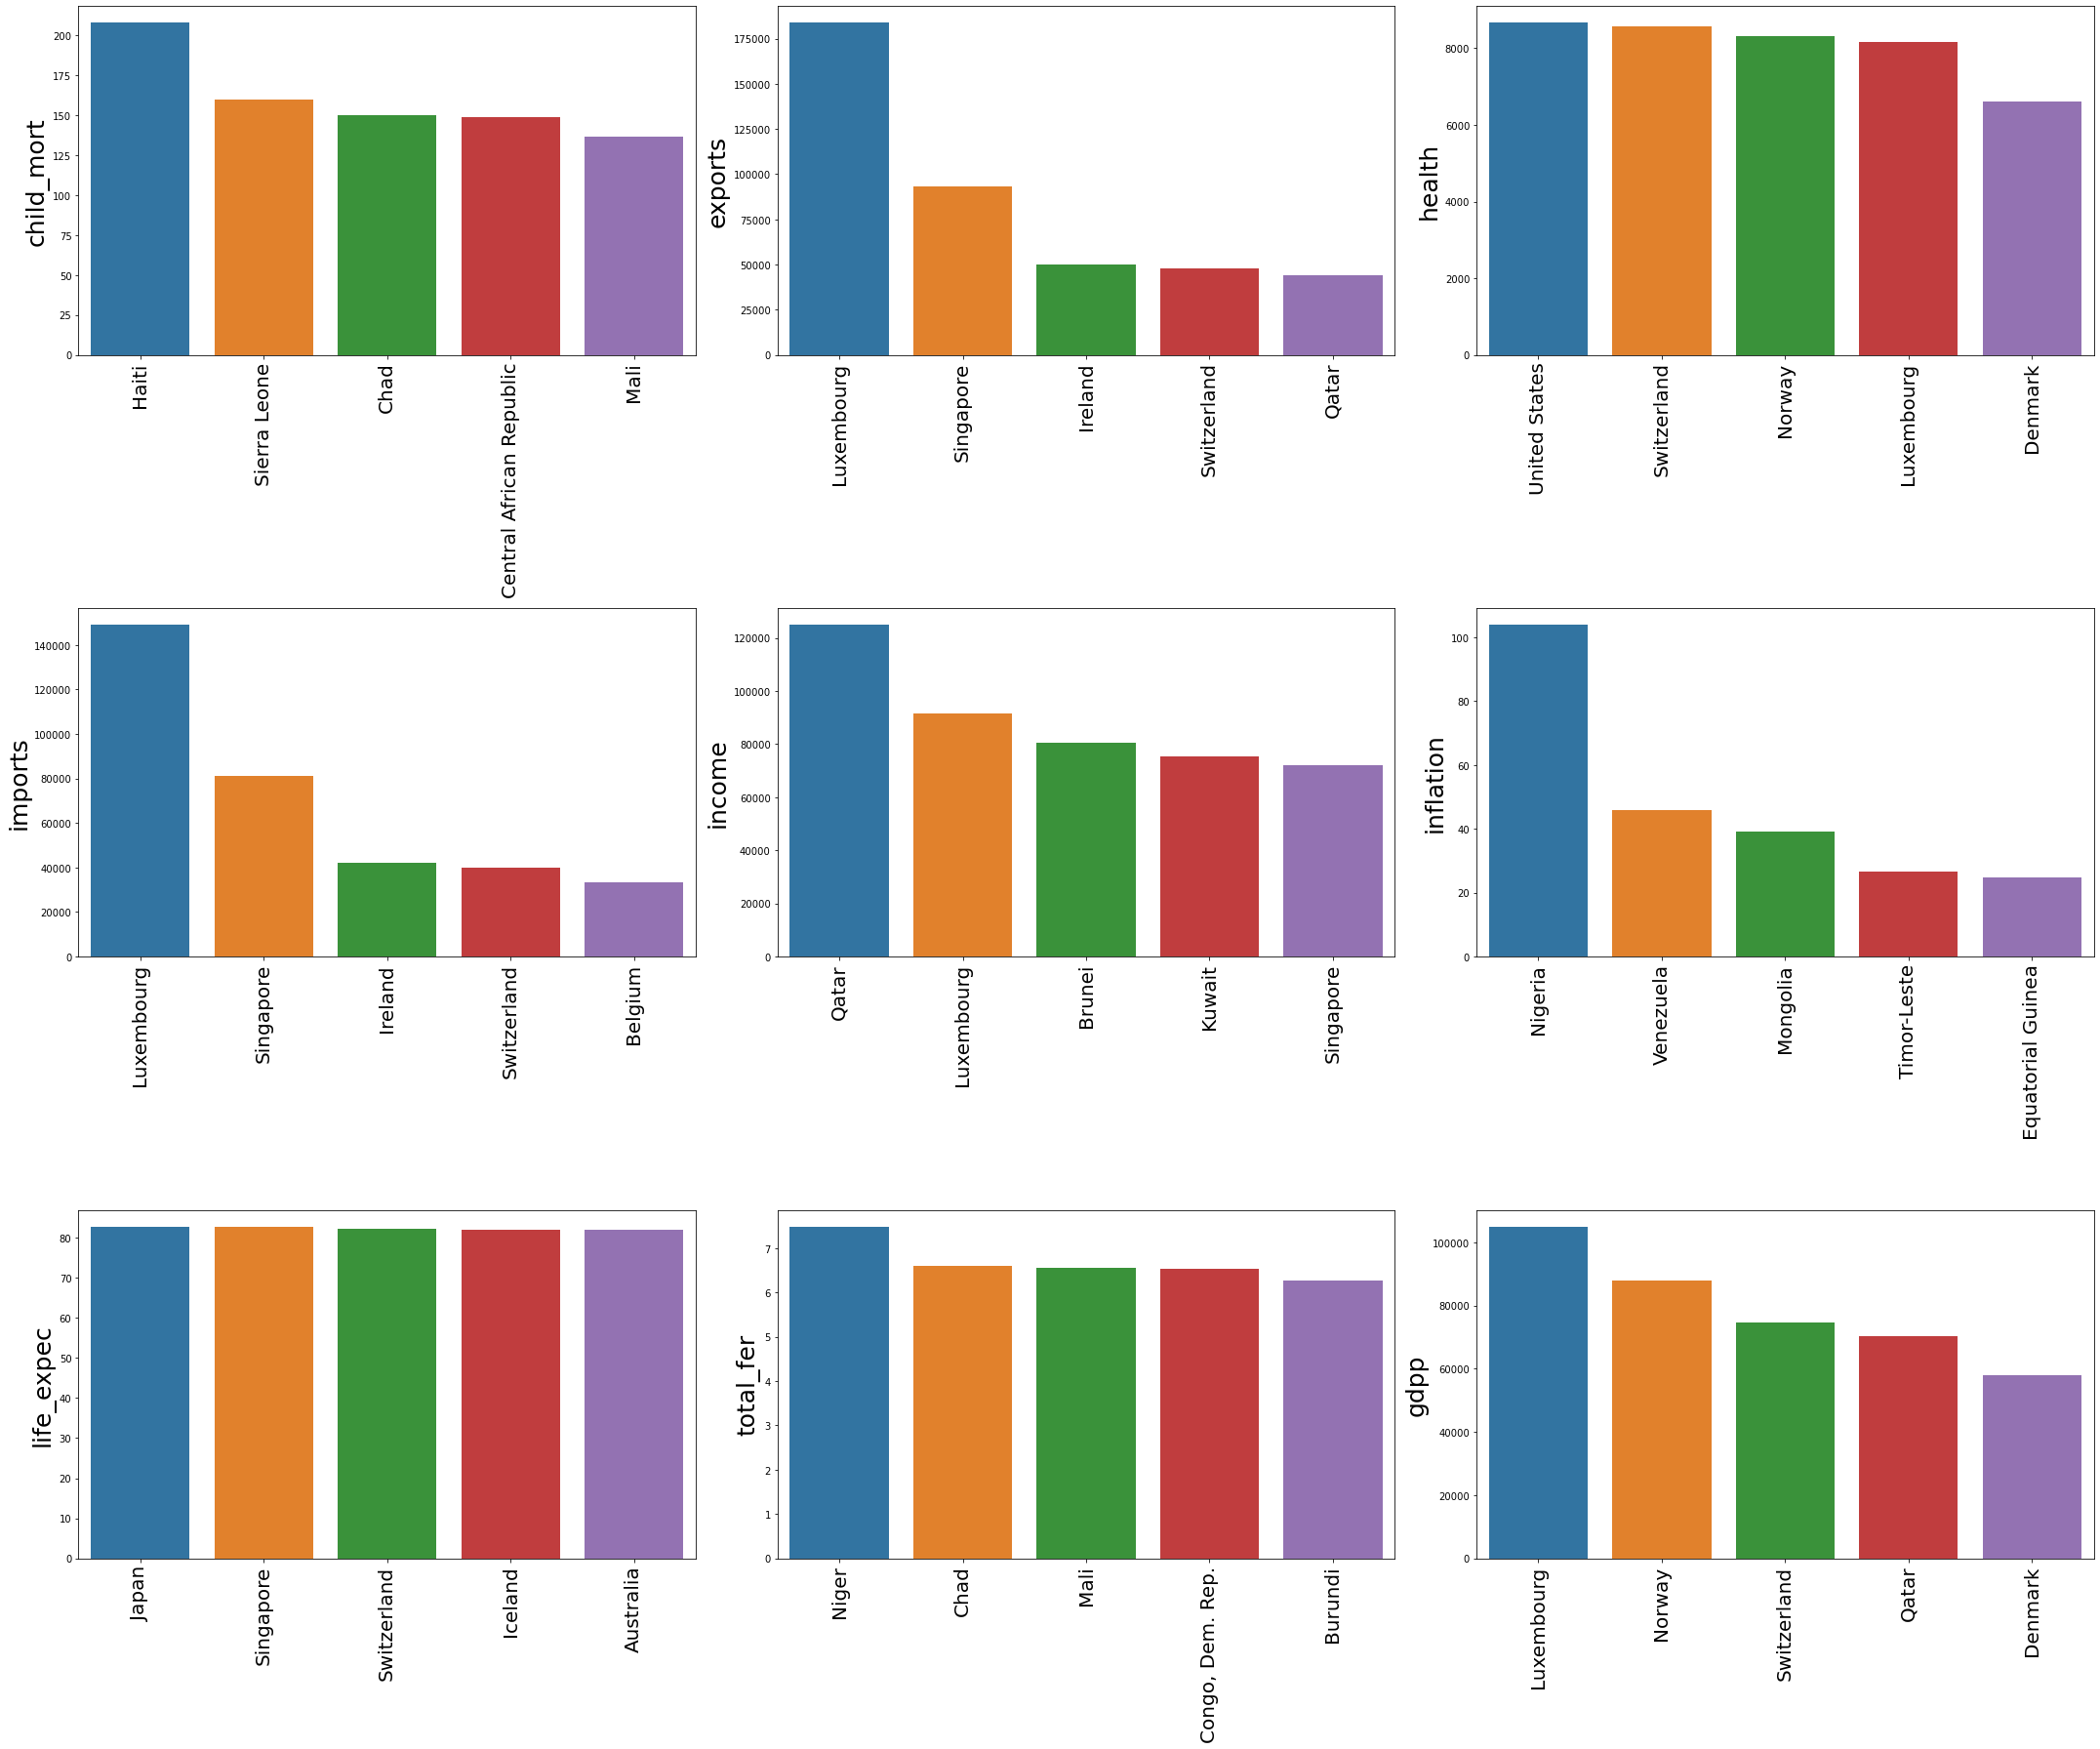

In [12]:
## let's check those countries which are high is respect of all the variables

fig = plt.figure(figsize=(30,25))
for i in enumerate(features):
    top = help_ngo[['country',i[1]]].sort_values(by=i[1],ascending=False).head(5)
    plt.subplot(3,3,i[0]+1)
    ax = sns.barplot(x="country",y=i[1],data=top)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90 , fontsize=20)
    ax.set_xlabel("")
    ax.set_ylabel(i[1],fontsize=25)
fig.tight_layout()
plt.show()

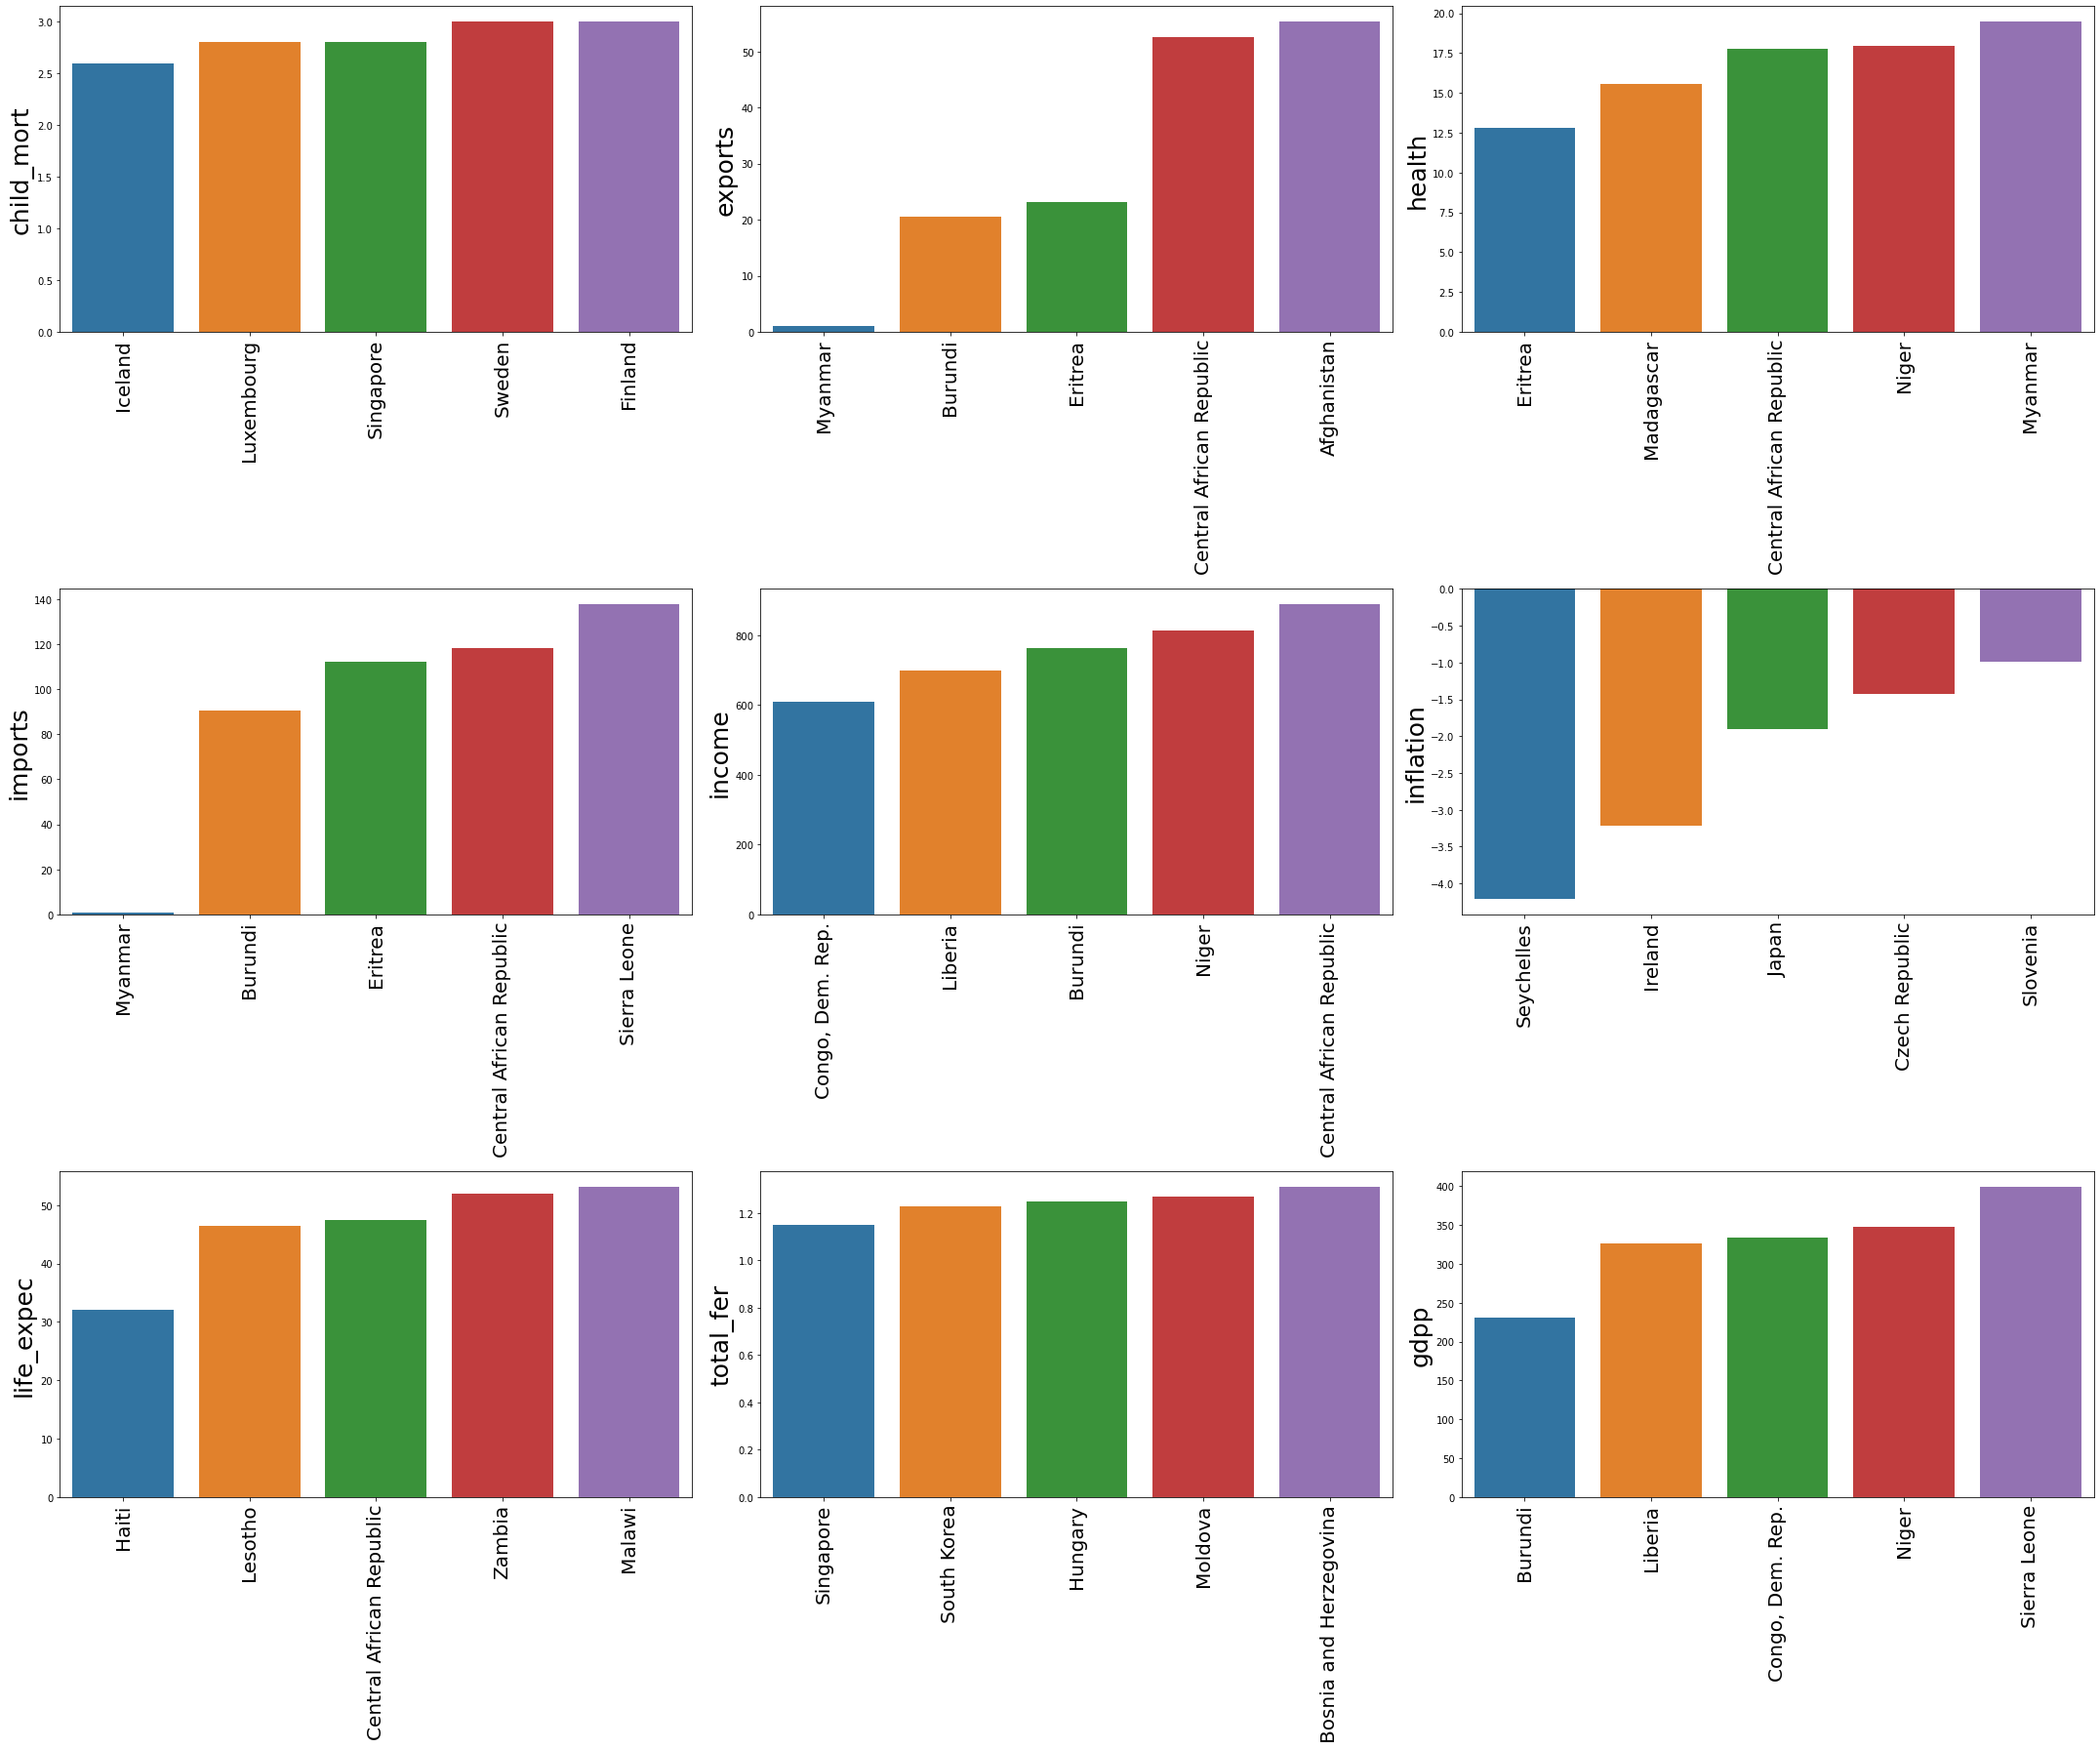

In [13]:
## let's check which countries are low in respect of all the variabels
fig = plt.figure(figsize=(30,25))
for i in enumerate(features):
    bottom = help_ngo[['country',i[1]]].sort_values(by=i[1],ascending=False).tail(5)
    plt.subplot(3,3,i[0]+1)
    ax = sns.barplot(x="country",y=i[1],data=bottom[::-1])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90 , fontsize=20)
    ax.set_xlabel("")
    ax.set_ylabel(i[1],fontsize=25)
fig.tight_layout()
plt.show()

As we can see some facts from the above figures summeriesd below
1. Mainly African countries has high child mortality rate and very low income , gdpp is also low
2. 'Haaiti' have maximum child mortality and minimum life expectancy
3. There is very low import and export in 'Mayanmar'
4. There is some countries which has a negative inflation rate (i.e seychelles,japan,ireland,check republic etc)
5. 'Qatar' has maximum income and high export rate 
6. 'Luxemberg' is maximum in import,export and gdpp and also have a high income rate 

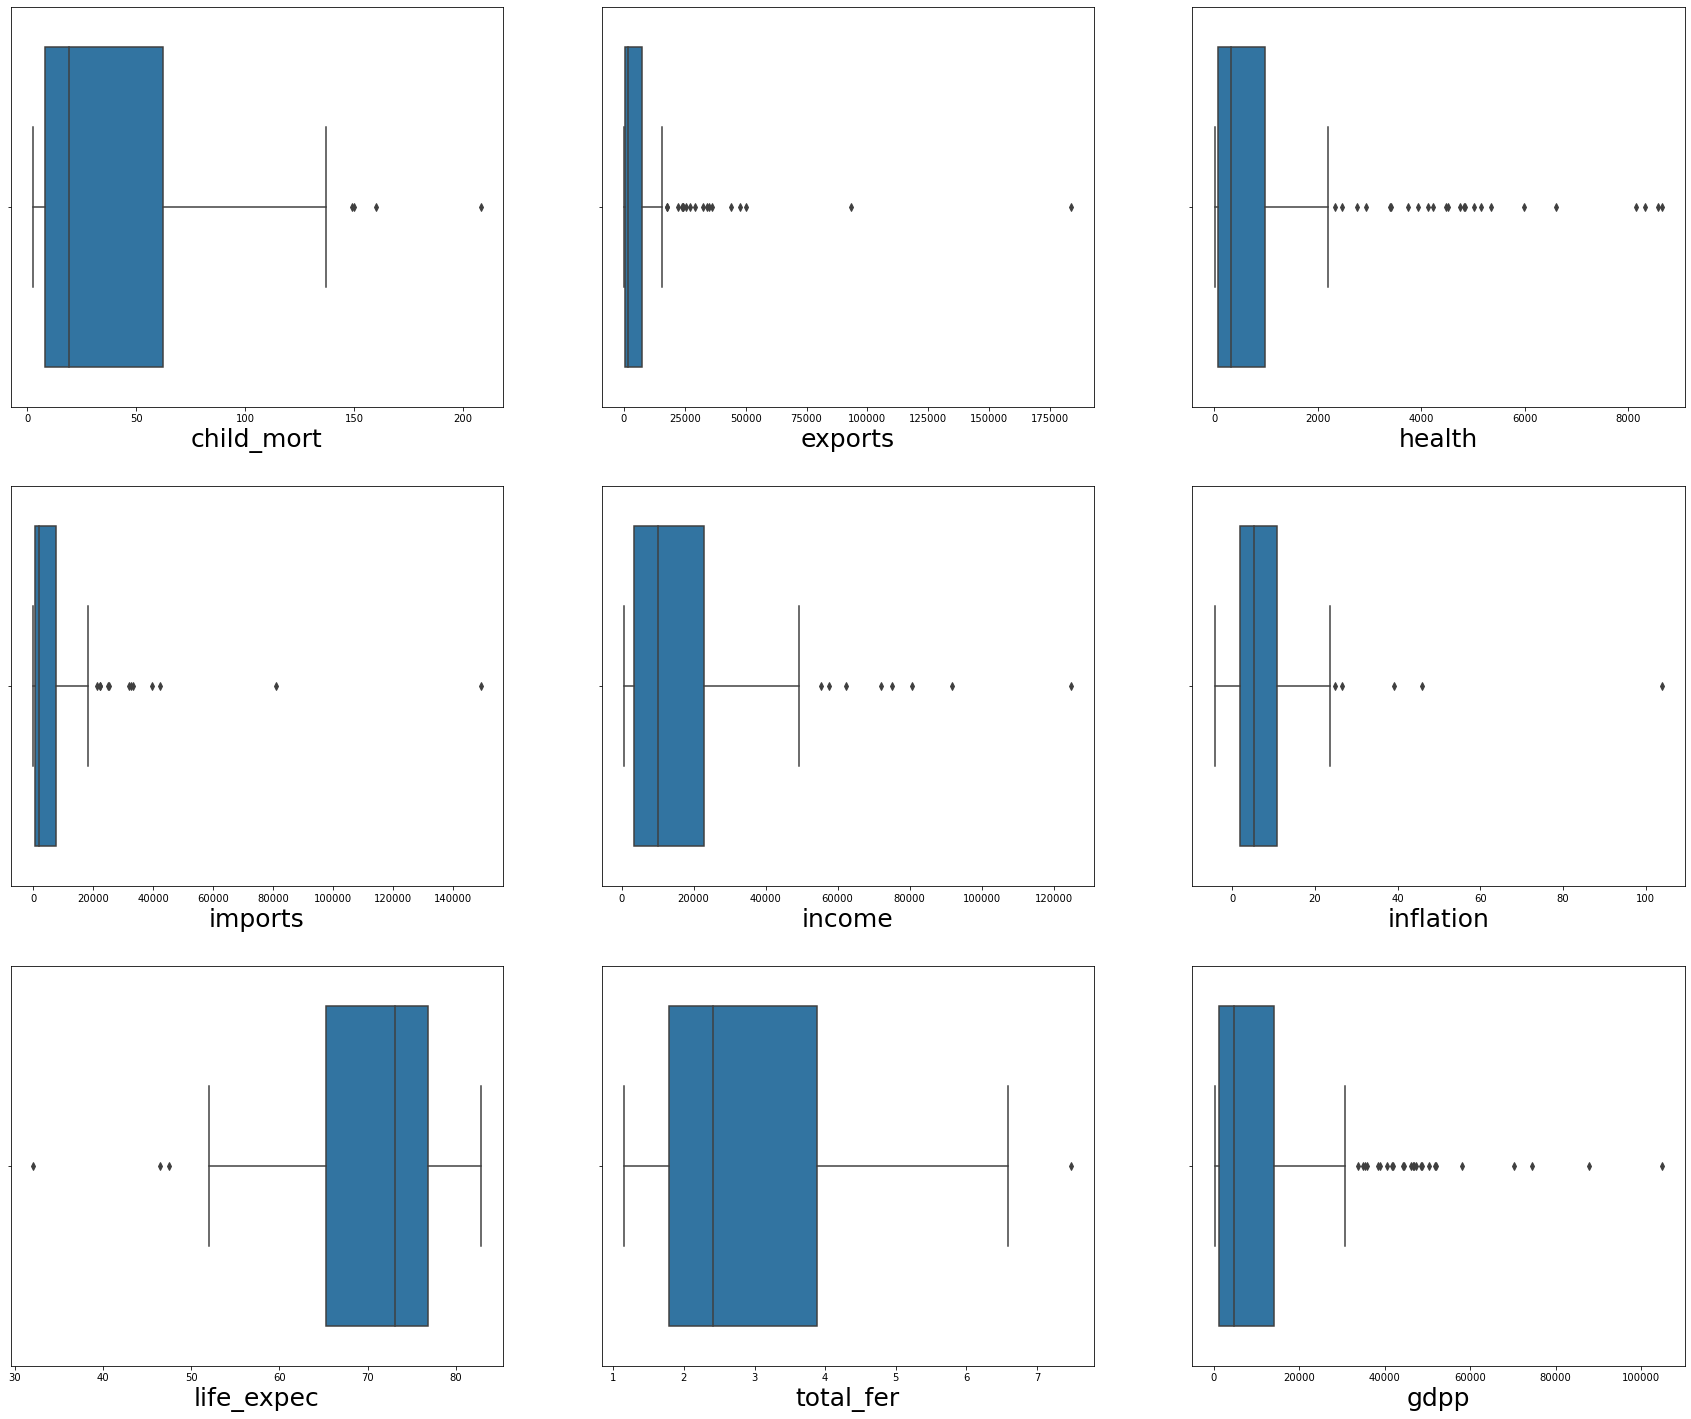

In [14]:
## lets check for outliers in variables 

plt.figure(figsize=(30,25))
features = help_ngo.columns[1:help_ngo.shape[1]]
for i in enumerate(features):
    #print(i)
    plt.subplot(3,3,i[0]+1)
    ax = sns.boxplot(help_ngo[i[1]])
    ax.set_xlabel(i[1],fontsize=25)


As I can see their are some good amount of outliers in the data. Hence if we remove those outliers some important information will loose on the other hand if we don't treat the outliers it can effect our clusters formation . In that case we will go for the PCA or principle component analyis. It will reduce dimentionality of the data and also preserve the important information of the data set.

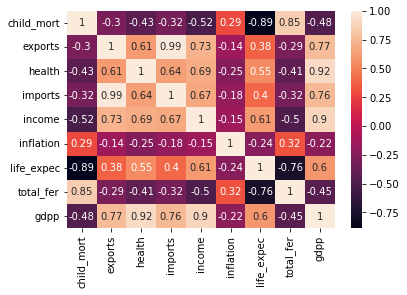

In [15]:
# Let's check the correlation coefficients to see which variables are highly correlated
corr_matrix = help_ngo[features]
sns.heatmap(corr_matrix.corr(),annot=True)
plt.show()

There are some features which are very positively co related like (child mortality and total fertility,import and export,income and export , gdp and export , gdp and health , gdp and income , gdp and import etc)
There are some features which are very negatively co  related like (life expectency and child mortality , life expectency and total fertility)

In [16]:
for i in enumerate(features):
    
    q1 = help_ngo[i[1]].quantile(0.05)
    q4 = help_ngo[i[1]].quantile(0.95)
    help_ngo[i[1]][help_ngo[i[1]]<=q1] = q1
    help_ngo[i[1]][help_ngo[i[1]]>=q4] = q4


I use Winsorization technique at 5th and 95th percentile which implies values that are less than the value at 1st percentile are replaced by the value at 5th percentile, and values that are greater than the value at 95th percentile are replaced by the value at 95th percentile. 

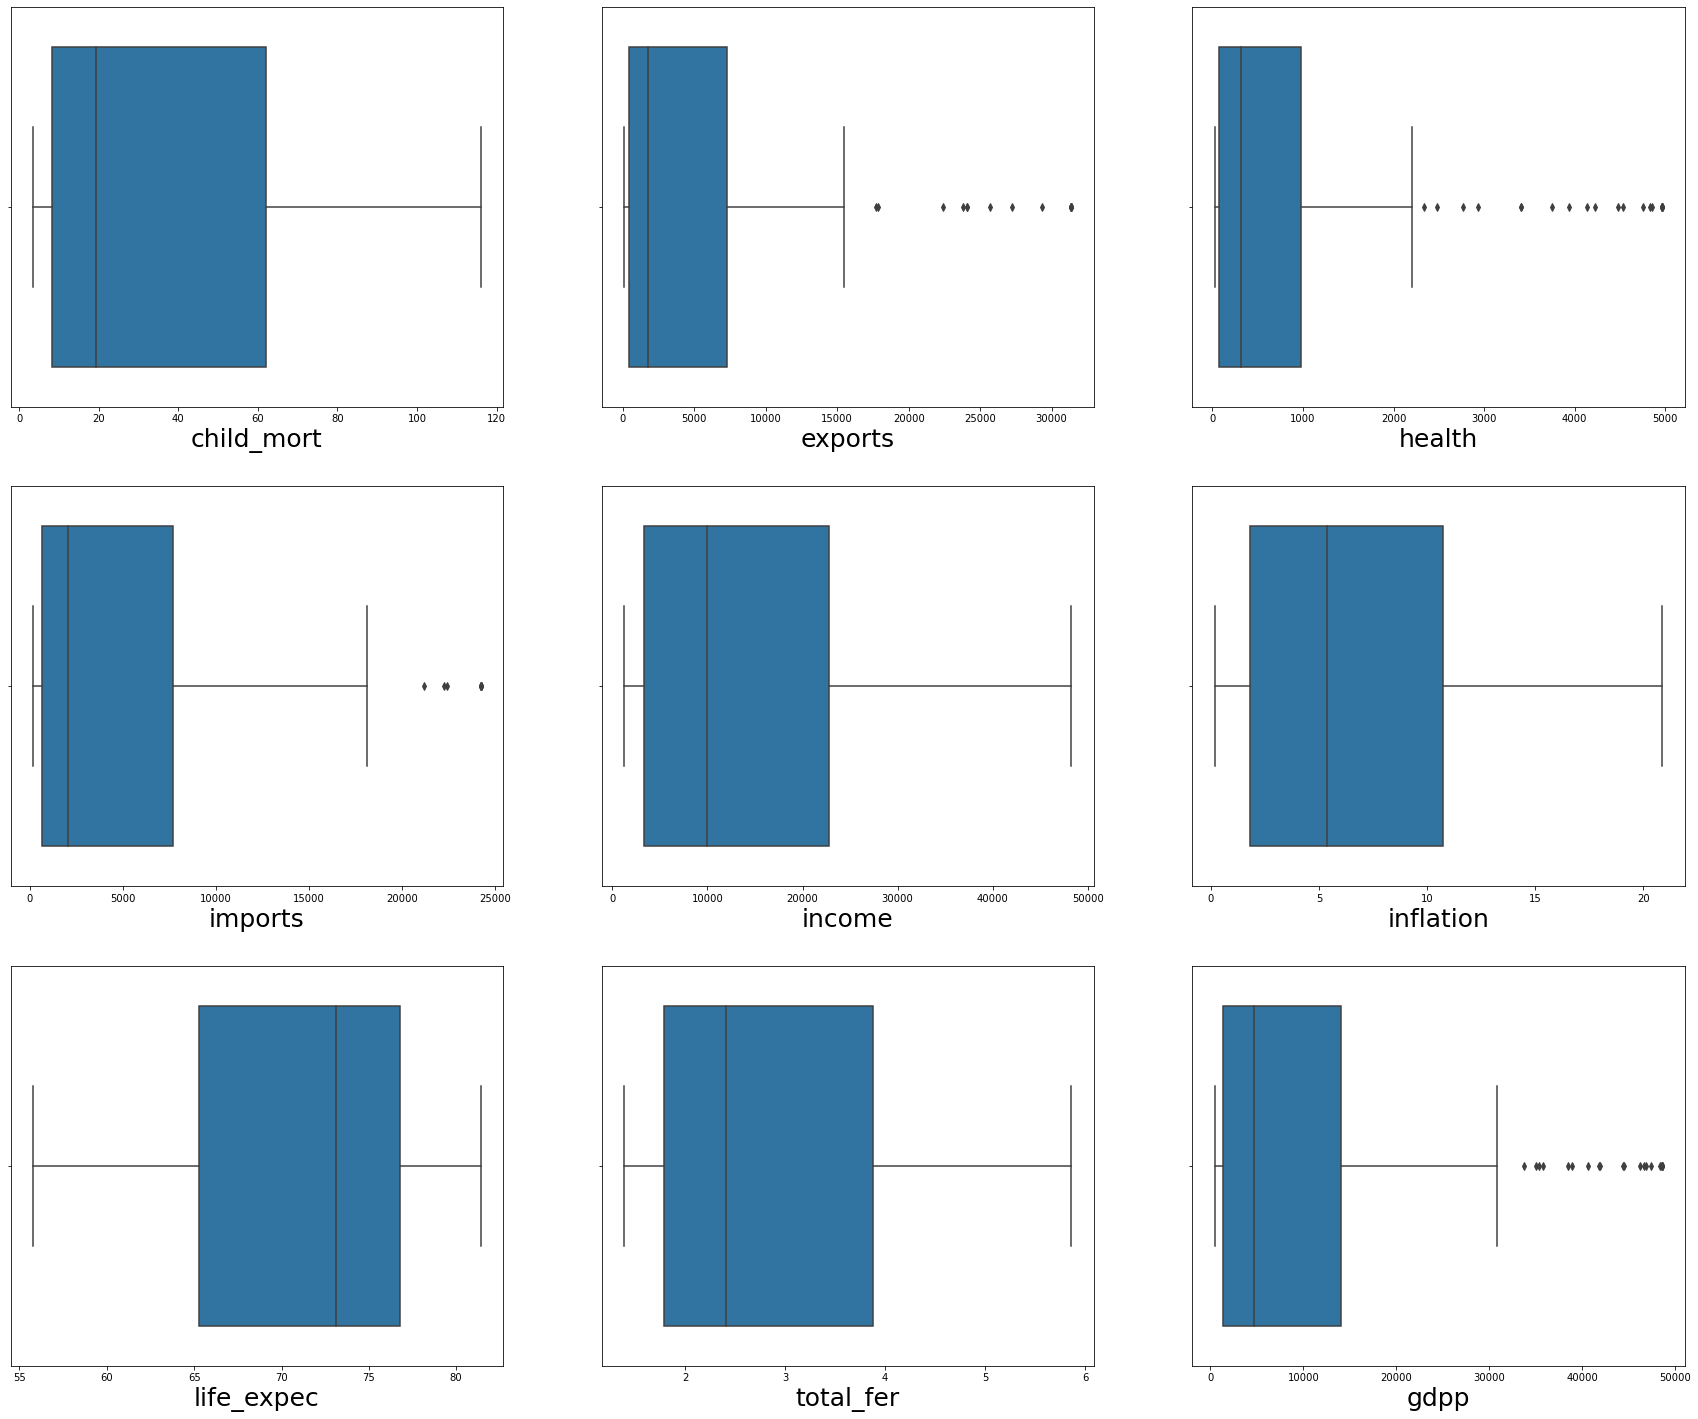

In [17]:
plt.figure(figsize=(30,25))
features = help_ngo.columns[1:help_ngo.shape[1]]
for i in enumerate(features):
    #print(i)
    plt.subplot(3,3,i[0]+1)
    ax = sns.boxplot(help_ngo[i[1]])
    ax.set_xlabel(i[1],fontsize=25)

# Data Preparation

In [18]:
## lets standardize our data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
model_data_ngo = sc.fit_transform(help_ngo[features])


In [19]:
## let's check transformed data 
model_data_ngo = pd.DataFrame(model_data_ngo)
model_data_ngo.columns = [features]
model_data_ngo.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


After soft range outliers capping There is no outliers in our dataset hence it is  ready for run our clustering model.

# Hopkins Test

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

In [20]:
## hopkins function 
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS


In [21]:
## let's check hopkin's score 

Hopkins_score = hopkins(model_data_ngo)
Hopkins_score

0.8728614925133372

approx 0.80% Hopkins score is a pretty good Hopkins score Hence dataset is appropriate for clustering.

Generally two metrices are used to find the optimal number of clusters for our algorithm.
1. silhouette score 
2. elbow curve


# Silhoutte Score

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

In [22]:
model_data_ngo.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


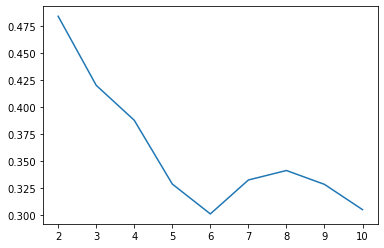

In [23]:
from sklearn.metrics  import silhouette_score
from sklearn.cluster  import KMeans
sil_score = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(model_data_ngo)
    sil_score.append([i,silhouette_score(model_data_ngo,kmeans.labels_)])
plt.plot(pd.DataFrame(sil_score)[0],pd.DataFrame(sil_score)[1])
plt.show()

As per Silhoutte score dataset is suitable to divide it into 3 clusters

# Elbow Curve
Another approch to find the appropriate number of clusters is elbow curve. The idea is to run k means algorithm for a number of k values and check sse for each value to find appropriate number of k.

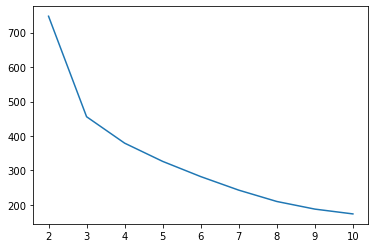

In [24]:
## let's make the elbow curve for our dataset
elbow_plot = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(model_data_ngo)
    elbow_plot.append([i,kmeans.inertia_])
plt.plot(pd.DataFrame(elbow_plot)[0],pd.DataFrame(elbow_plot)[1])
plt.show()

If we draw a straight line from the top point of the elbow curve to the last point of the elbow curve it is clear that sse or sum of squared error is minimum for k = 3 
Hence we will chose k is equal to 3 for our k means algorithm.

# Model Building

In [25]:
## let's run our k means algorithm for k = 3 
kmeans = KMeans(n_clusters=3,random_state=10).fit(model_data_ngo)
kmeans.labels_
## check labels

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [26]:
help_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0


In [27]:


## add label column in help_ngo
help_ngo['cluster_id'] = kmeans.labels_


In [28]:
## check head of the data frame once 
help_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,2
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,0
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,2
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,0


# Cluster visualization

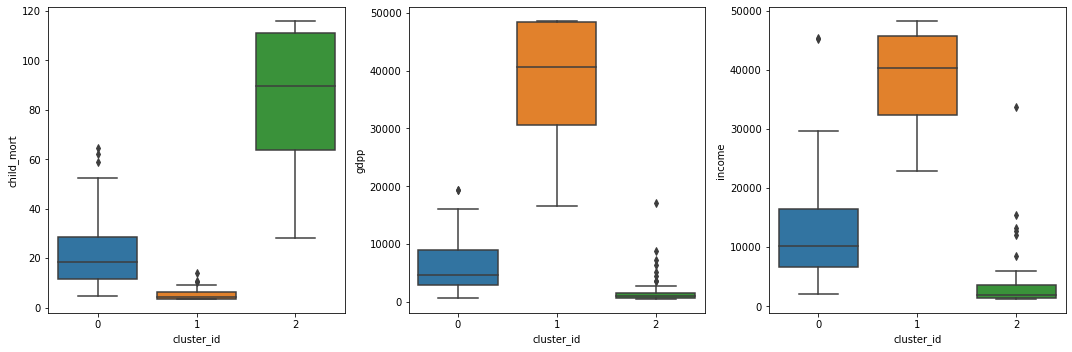

In [29]:
plt.figure(figsize=(15,5))


plt.subplot(1,3,1)
sns.boxplot(x='cluster_id',y='child_mort',data=help_ngo)
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id',y='gdpp',data=help_ngo)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id',y='income',data=help_ngo)

plt.tight_layout()
plt.show()

From the above graph it is clear that countries of cluster id 2 needed aid more than other countries as their child mortality rate is more than other countries and also their income and gdpp is very low compared to other countries. 

In [30]:
recomend = help_ngo[help_ngo.cluster_id==2]
recomend.sort_values(by='child_mort',ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
32,Chad,116.0,330.0960,40.63410,390.195,1930.0,6.39,56.50,5.861,897.0,2
31,Central African Republic,116.0,70.4688,26.71592,169.281,1213.0,2.01,55.78,5.210,465.9,2
113,Nigeria,116.0,589.4900,118.13100,405.420,5150.0,20.87,60.50,5.840,2330.0,2
132,Sierra Leone,116.0,70.4688,52.26900,169.281,1220.0,17.20,55.78,5.200,465.9,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.50,5.861,465.9,2
66,Haiti,116.0,101.2860,45.74420,428.314,1500.0,5.45,55.78,3.330,662.0,2
112,Niger,116.0,77.2560,26.71592,170.868,1213.0,2.55,58.80,5.861,465.9,2
97,Mali,116.0,161.4240,35.25840,248.508,1870.0,4.37,59.50,5.861,708.0,2
25,Burkina Faso,116.0,110.4000,38.75500,170.200,1430.0,6.81,57.90,5.861,575.0,2
3,Angola,116.0,2199.1900,100.60500,1514.370,5900.0,20.87,60.10,5.861,3530.0,2


Recommendation based on clutering.

# Hierarchical Clustering

In [31]:
import scipy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [32]:
## drop country column


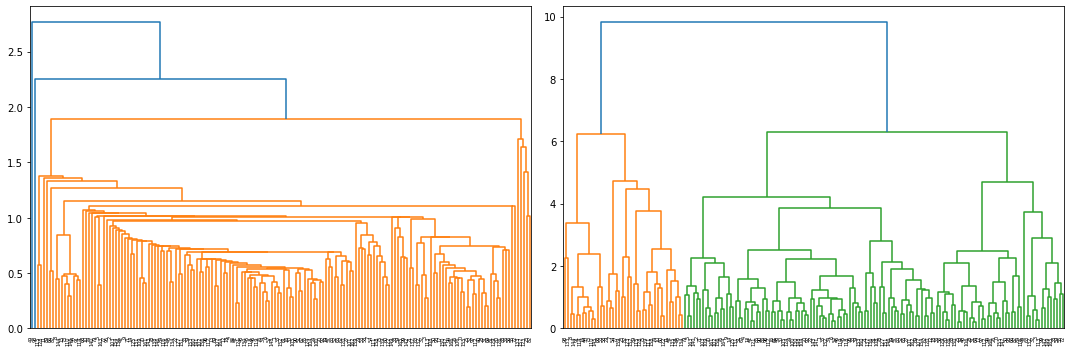

In [33]:
## single linkage
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
single_linkage = linkage(model_data_ngo,method='single',metric='euclidean')
dendrogram(single_linkage)
## complete linkage
plt.subplot(1,2,2)
complete_linkage = linkage(model_data_ngo,method='complete',metric='euclidean')
dendrogram(complete_linkage)
plt.tight_layout()
plt.show()


From above two graphs it is shown that if i cut the tree at level 2.0 it will give three distinct clusters.

In [34]:
cluster_id2 = cut_tree(complete_linkage,n_clusters=3).reshape(-1,)
cluster_id2

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [35]:
help_ngo['cluster_id2'] = cluster_id2
help_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id2
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,2,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,0,1
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,0,1
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,0,1


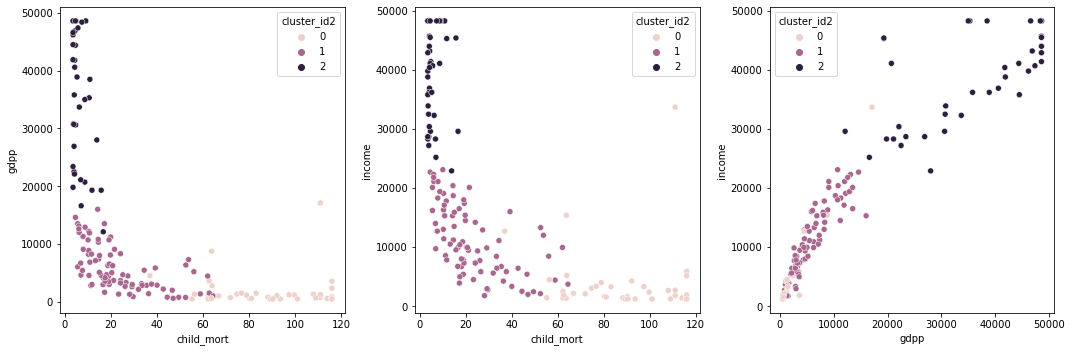

In [36]:
## lets visualize clusters
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort',y='gdpp',data=help_ngo,hue='cluster_id2')

plt.subplot(1,3,2)
sns.scatterplot(x='child_mort',y='income',data=help_ngo,hue='cluster_id2')

plt.subplot(1,3,3)
sns.scatterplot(x='gdpp',y='income',data=help_ngo,hue='cluster_id2')
plt.tight_layout()
plt.show()

It is clear from the graph that countries belongs to cluster id 0 is high in child mortality and low in respect of income and gdpp.

In [37]:
## recommendation based on hierarchical clustering
recomend2 = help_ngo[help_ngo['cluster_id2']==0]
recomend2.sort_values('child_mort',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id2
132,Sierra Leone,116.0,70.4688,52.26900,169.281,1220.0,17.20,55.78,5.200,465.9,2,0
32,Chad,116.0,330.0960,40.63410,390.195,1930.0,6.39,56.50,5.861,897.0,2,0
3,Angola,116.0,2199.1900,100.60500,1514.370,5900.0,20.87,60.10,5.861,3530.0,2,0
66,Haiti,116.0,101.2860,45.74420,428.314,1500.0,5.45,55.78,3.330,662.0,2,0
112,Niger,116.0,77.2560,26.71592,170.868,1213.0,2.55,58.80,5.861,465.9,2,0


In [38]:
## lets store the value of average of income and gdpp of cluster 0
avg_income = recomend2['income'].mean()
avg_gdpp = recomend2['gdpp'].mean()
avg_child_mort = recomend2['child_mort'].mean()

In [39]:
top_recom = recomend2[(recomend2.income<=avg_income) & (recomend2.gdpp<=avg_gdpp) & (recomend2.child_mort>=avg_child_mort)]
## final ist of top recommendation

Sorting countries of cluster 0 showing only those countries whose child mortality rate is higher than average of cluster 0 and income and gdpp is less than average of cluster 0.

In [40]:
top_recom.sort_values(by='child_mort',ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id2
132,Sierra Leone,116.0,70.4688,52.26900,169.281,1220.0,17.200,55.78,5.200,465.9,2,0
112,Niger,116.0,77.2560,26.71592,170.868,1213.0,2.550,58.80,5.861,465.9,2,0
97,Mali,116.0,161.4240,35.25840,248.508,1870.0,4.370,59.50,5.861,708.0,2,0
31,Central African Republic,116.0,70.4688,26.71592,169.281,1213.0,2.010,55.78,5.210,465.9,2,0
32,Chad,116.0,330.0960,40.63410,390.195,1930.0,6.390,56.50,5.861,897.0,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.800,57.50,5.861,465.9,2,0
66,Haiti,116.0,101.2860,45.74420,428.314,1500.0,5.450,55.78,3.330,662.0,2,0
25,Burkina Faso,116.0,110.4000,38.75500,170.200,1430.0,6.810,57.90,5.861,575.0,2,0
64,Guinea-Bissau,114.0,81.5030,46.49500,192.544,1390.0,2.970,55.78,5.050,547.0,2,0
17,Benin,111.0,180.4040,31.07800,281.976,1820.0,0.885,61.80,5.360,758.0,2,0


Above countries are high in child mortality and also low in income and gdpp 

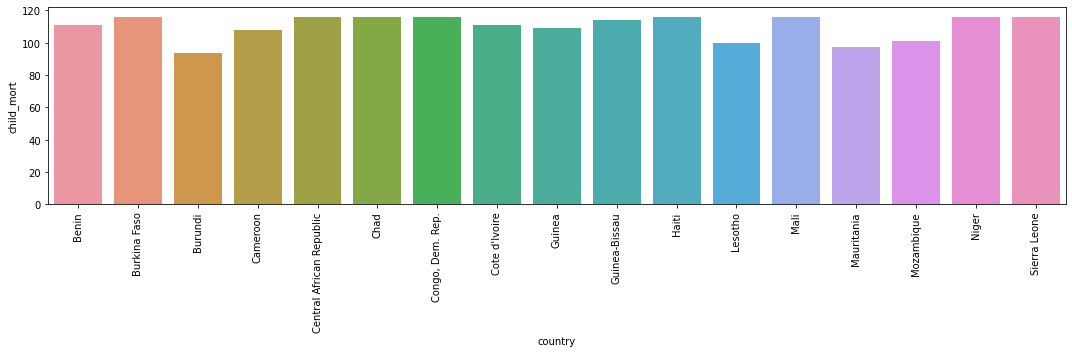

In [41]:
## lets visualise final recommendation
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
ax = sns.barplot(x='country',y='child_mort',data=top_recom)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90 , fontsize=10)
plt.tight_layout()
plt.show()

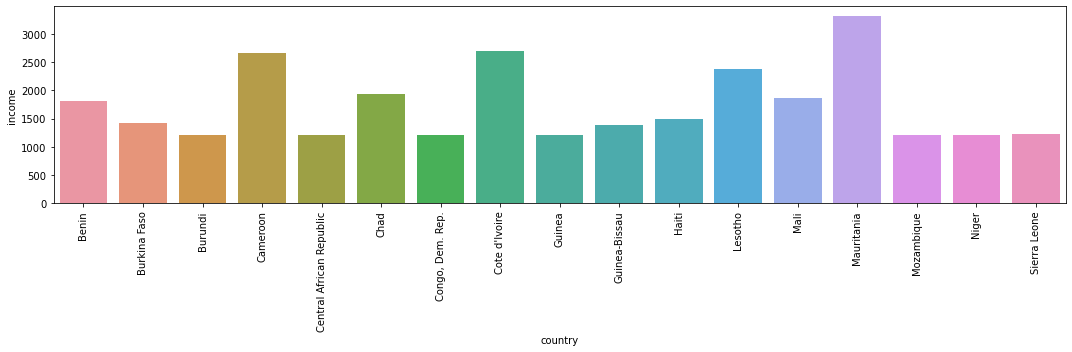

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
ax = sns.barplot(x='country',y='income',data=top_recom)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90 , fontsize=10)
plt.tight_layout()
plt.show()

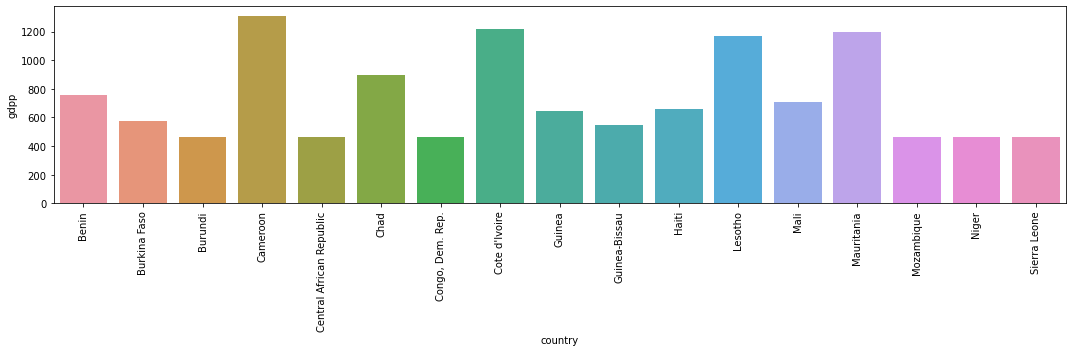

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
ax = sns.barplot(x='country',y='gdpp',data=top_recom)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90 , fontsize=10)
plt.tight_layout()
plt.show()

# Conclusion

According to the above graphs and my full analysis i want to recommend the following 5 countries based on some socio economic factor like high child mortality , low income and low gdpp.
1. Sierra Leone	
2. Niger
3. Mali
4. Central African Republic	
5. Chad